Data cleaning
#2 Null -> remove , replace
#3 outliers -> remove , ignore
#4 duplicate -> remove , allowed
#5 column -> samedata -> remove
#6 string -> encode -> Numeric (preprocessing)
#7 skewness ->
#8 correlation , Hypothesis -> remove

#today: Data Understanding: Identify the types of variables (continuous, categorical) and their distributions. Some rubbish values are present in ‘Material_Reference’ which starts with ‘00000’ value which should be converted into null. Treat reference columns as categorical variables. INDEX may not be useful.
Data Preprocessing:
Handle missing values with mean/median/mode.


In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('/content/Copper_Set.xlsx - Result 1.csv')
df.head()

<ipython-input-2-574efc3d741d>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Copper_Set.xlsx - Result 1.csv')


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [3]:
#as id and material_ref are not needed, we can drop the columns

df.drop(['id','material_ref'], axis = 1, inplace = True)
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00


In [4]:
df.rename(columns = {'quantity tons': 'quantity_tons',
                     'item type': 'item_type',
                     'delivery date': 'delivery_date'}, inplace = True)

In [5]:
import numpy as np

In [6]:
df.dtypes

item_date        float64
quantity_tons     object
customer         float64
country          float64
status            object
item_type         object
application      float64
thickness        float64
width            float64
product_ref        int64
delivery_date    float64
selling_price    float64
dtype: object

In [7]:
df[df.duplicated()]#no duplicated values

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price


In [8]:
df.isnull().sum()

item_date         1
quantity_tons     0
customer          1
country          28
status            2
item_type         0
application      24
thickness         1
width             0
product_ref       0
delivery_date     1
selling_price     1
dtype: int64

In [9]:
#changing to suitable format of dtypes for item_date & delivery_date


df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce')
df['delivery_date']=pd.to_datetime(df['delivery_date'], format = '%Y%m%d', errors = 'coerce')
df['quantity_tons'] = pd.to_numeric(df['quantity_tons'], errors = 'coerce')

In [10]:
# as columns which have null values less than 1% can removed instead of replacing with values.
df.dropna(subset = ['item_date', 'delivery_date', 'customer', 'status', 'thickness', 'selling_price', 'quantity_tons', 'country', 'application'], inplace = True)

In [11]:
df.isnull().sum()

item_date        0
quantity_tons    0
customer         0
country          0
status           0
item_type        0
application      0
thickness        0
width            0
product_ref      0
delivery_date    0
selling_price    0
dtype: int64

In [17]:
df.dtypes # checking dtypes again after convert into preferred dtype for columns

item_date        datetime64[ns]
quantity_tons           float64
customer                float64
country                 float64
status                   object
item_type                object
application             float64
thickness               float64
width                   float64
product_ref               int64
delivery_date    datetime64[ns]
selling_price           float64
dtype: object

In [91]:
from dataprep.eda import create_report

In [ ]:
create_report(df)

In [ ]:
#finding outliers using IQR(interquantile Range)
#IQR >>> steps: sorted in ascending order, split into quantiles(Q1 --- 25% of data ,Q2 --- 50% of data ,Q3 ----75% of data)
###Most important is finding the percentile which can done by numpy. np.percentile(data, )
###The data points which fall below lower bound = Q1 – 1.5 IQR or above higher bounds = Q3 + 1.5 IQR are outliers.

In [12]:
#required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df.shape

(181633, 12)

In [14]:
df.describe()

,quantity_tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816330e+05,1.816330e+05,181633.000000,181633.000000,181633.000000,181633.000000,1.816330e+05,1.816330e+05
mean,5.876167e+03,3.023251e+07,44.893010,25.616072,2.564190,1295.263685,4.740346e+08,1.918355e+03
std,2.349333e+06,1.005621e+05,24.404237,17.753933,6.572602,261.644745,7.175403e+08,3.318313e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.096819e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036258e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716145e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,3.040818e+07,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [21]:
df_columns = df[['quantity_tons', 'customer', 'country', 'application', 'thickness', 'width', 'product_ref', 'selling_price']]
df_columns

,quantity_tons,customer,country,application,thickness,width,product_ref,selling_price
0,54.151139,30156308.0,28.0,10.0,2.00,1500.0,1670798778,854.00
1,768.024839,30202938.0,25.0,41.0,0.80,1210.0,1668701718,1047.00
2,386.127949,30153963.0,30.0,28.0,0.38,952.0,628377,644.33
3,202.411065,30349574.0,32.0,59.0,2.30,1317.0,1668701718,768.00
4,785.526262,30211560.0,28.0,10.0,4.00,2000.0,640665,577.00
...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,41.0,0.96,1220.0,164141591,591.00
181669,208.086469,30200854.0,25.0,41.0,0.95,1500.0,164141591,589.00
181670,4.235594,30200854.0,25.0,41.0,0.71,1250.0,164141591,619.00
181671,-2000.000000,30200854.0,25.0,41.0,0.85,1250.0,164141591,601.00


In [22]:
##### Visualize the data columns before handling outliers

In [15]:
# df['quantity_tons']
q1 = df['quantity_tons'].quantile(0.25)
q3 = df['quantity_tons'].quantile(0.75)
iqr = q3 - q1
low_bound = q1 - 1.5 * iqr
high_bound = q3 + 1.5 * iqr
outliers = (df['quantity_tons'] < low_bound) | (df['quantity_tons'] > high_bound)
print(low_bound)
print(high_bound)
print(iqr)

-73.32170135999999
151.45134783999998
56.1932623


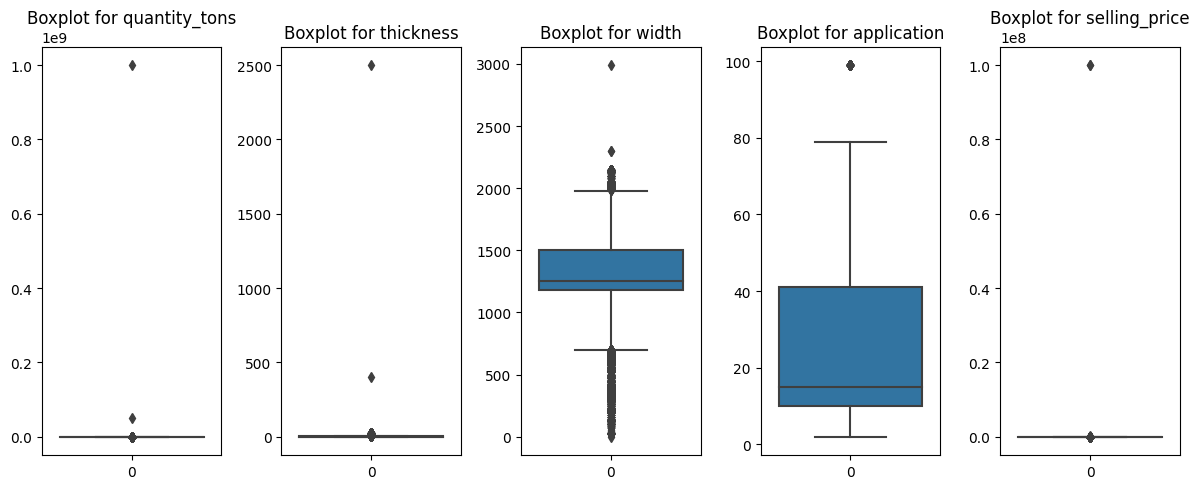

In [16]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 5))

# Plot for col1
sns.boxplot(df['quantity_tons'], ax=axes[0])
axes[0].set_title(f'Boxplot for {"quantity_tons"}')

# Plot for col2
sns.boxplot(df['thickness'], ax=axes[1])
axes[1].set_title(f'Boxplot for {"thickness"}')

# Plot for col3
sns.boxplot(df['width'], ax=axes[2])
axes[2].set_title(f'Boxplot for {"width"}')

# Plot for col4
sns.boxplot(df['application'], ax=axes[3])
axes[3].set_title(f'Boxplot for {"application"}')

# Plot for col5
sns.boxplot(df['selling_price'], ax=axes[4])
axes[4].set_title(f'Boxplot for {"selling_price"}')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [59]:
# q1 = df['quantity_tons'].quantile(0.25)
# q3 = df['quantity_tons'].quantile(0.75)
# iqr = q3 - q1
# low_bound = q1 - 1.5 * iqr
# high_bound = q3 + 1.5 * iqr
# outliers = (df['quantity_tons'] < low_bound) | (df['quantity_tons'] > high_bound)
# ls_out = df[outliers].index.tolist()
# len(ls_out)

4964

In [ ]:
#creating function to get the outlier indices to list for column and remove the indices by drop

In [17]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    low_bound = q1 - 1.5 * iqr
    high_bound = q3 + 1.5 * iqr
    outliers = (df[column_name] < low_bound) | (df[column_name] > high_bound)
    outlier_indices = df[outliers].index.tolist()
    df.drop(outlier_indices, inplace = True)

In [22]:
# df_columns = df[['quantity_tons', 'application', 'thickness', 'width', 'selling_price']]
remove_outliers(df, 'application')
remove_outliers(df, 'width')
remove_outliers(df, 'selling_price')
remove_outliers(df, 'thickness')
remove_outliers(df, 'quantity_tons')

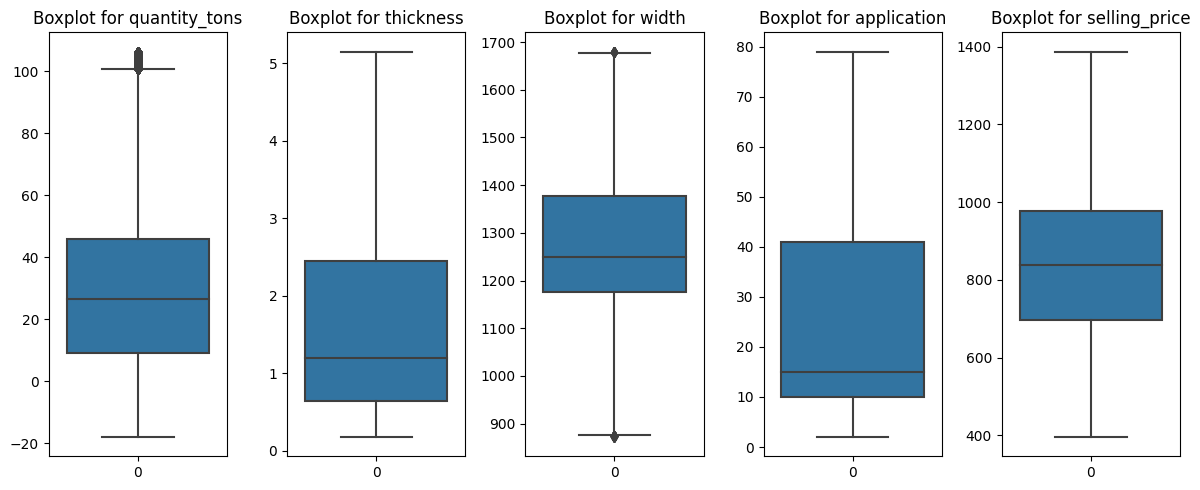

In [23]:
#visualize after triming outliers

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 5))

# Plot for col1
sns.boxplot(df['quantity_tons'], ax=axes[0])
axes[0].set_title(f'Boxplot for {"quantity_tons"}')

# Plot for col2
sns.boxplot(df['thickness'], ax=axes[1])
axes[1].set_title(f'Boxplot for {"thickness"}')

# Plot for col3
sns.boxplot(df['width'], ax=axes[2])
axes[2].set_title(f'Boxplot for {"width"}')

# Plot for col4
sns.boxplot(df['application'], ax=axes[3])
axes[3].set_title(f'Boxplot for {"application"}')

# Plot for col5
sns.boxplot(df['selling_price'], ax=axes[4])
axes[4].set_title(f'Boxplot for {"selling_price"}')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [24]:
#identify skewness in data for each column

skwed_col=[]
skw_col = ['quantity_tons', 'customer', 'country', 'thickness', 'width','product_ref', 'selling_price']
for i in skw_col:
  skw_value = df[i].skew()
  if -170 <= skw_value and skw_value <= 1:
    skwed_col.append(i)

In [25]:
skwed_col

['customer', 'country', 'width', 'selling_price']

In [26]:
print('skew_value of quantitiy_tone', df['quantity_tons'].skew())
print('skew_value of customer', df['customer'].skew())
print('skew_value of country', df['country'].skew())
print('skew_value of thickness', df['thickness'].skew())
print('skew_value of width', df['width'].skew())
print('skew_value of product_ref', df['product_ref'].skew())
print('skew_value of selling_price', df['selling_price'].skew())
print('skew_value of application', df['application'].skew())

skew_value of quantitiy_tone 1.0720114284207258
skew_value of customer -164.82671029728624
skew_value of country 0.6713249557027094
skew_value of thickness 1.1391217683784136
skew_value of width -0.025117131084082582
skew_value of product_ref 1.0147845486647318
skew_value of selling_price 0.3255510744760373
skew_value of application 0.6352143026811969


In [27]:
df.head()

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.0
8,2021-04-01,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,1668701376,2021-07-01,1363.0
12,2021-04-01,27.512545,30165529.0,78.0,Won,W,10.0,0.75,1250.0,164141591,2021-07-01,1098.0
13,2021-04-01,32.235317,30202362.0,27.0,Won,S,10.0,0.60,1010.0,628377,2021-07-01,973.0
14,2021-04-01,10.411350,30271717.0,28.0,To be approved,W,10.0,0.60,1250.0,611993,2021-07-01,1258.0


In [28]:
df['status'].unique()

array(['Won', 'To be approved', 'Lost', 'Not lost for AM', 'Wonderful',
       'Revised', 'Offered', 'Offerable'], dtype=object)

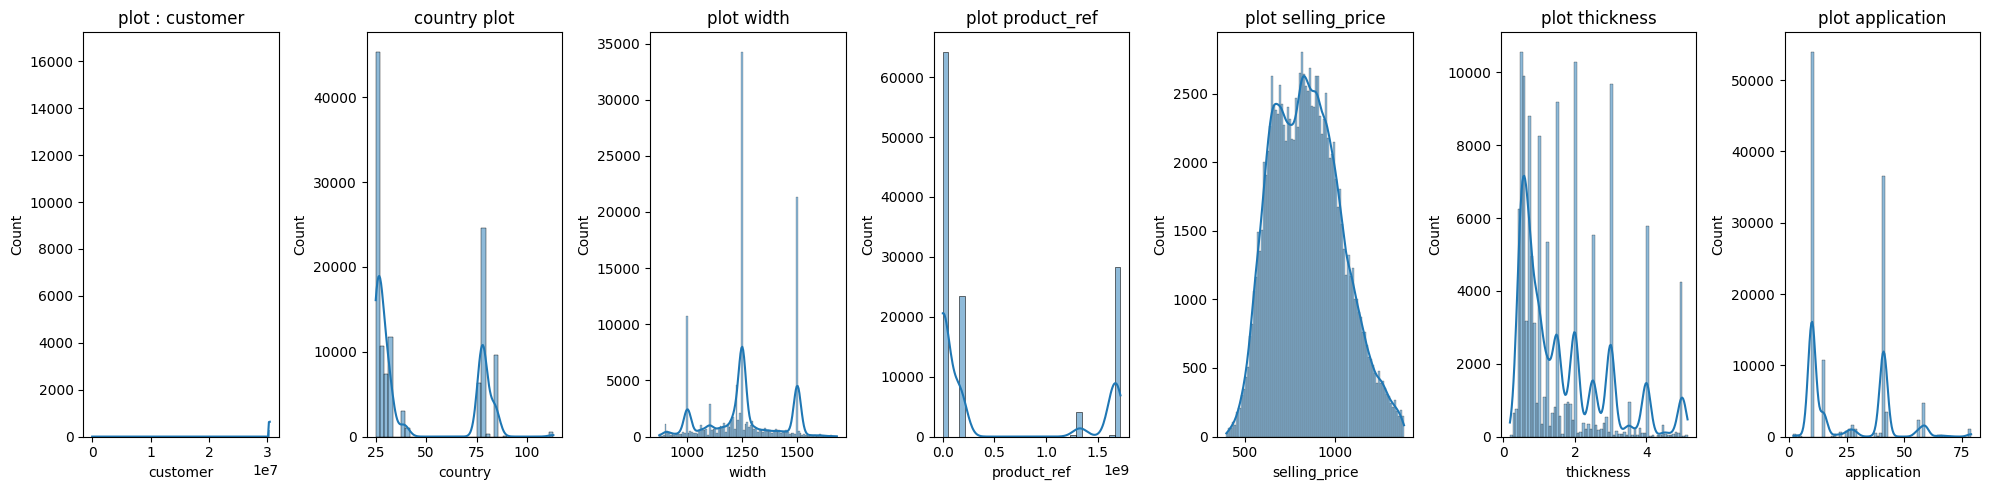

In [29]:
##### Viualize the data before correcting the skewness

 #Create subplots
fig, axes = plt.subplots(1, 7, figsize=(20, 5))
# 'width', 'product_ref', 'selling_price', thickness
# Plot 1: Histogram
sns.histplot(df['customer'], kde=True, ax=axes[0])
axes[0].set_title('plot : customer')

# Plot 2:
sns.histplot(df['country'], kde=True, ax=axes[1])
axes[1].set_title('country plot')

# Plot 3:
sns.histplot(df['width'], kde=True, ax=axes[2])
axes[2].set_title('plot width')

# Plot 3:
sns.histplot(df['product_ref'], kde=True, ax=axes[3])
axes[3].set_title('plot product_ref')

# Plot 4:
sns.histplot(df['selling_price'], kde=True, ax=axes[4])
axes[4].set_title('plot selling_price')

# Plot 5:
sns.histplot(df['thickness'], kde=True, ax=axes[5])
axes[5].set_title('plot thickness')

# Plot 6:
sns.histplot(df['application'], kde=True, ax=axes[6])
axes[6].set_title('plot application')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

<ipython-input-37-e14b215467c5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap="RdYlGn")


<Axes: >

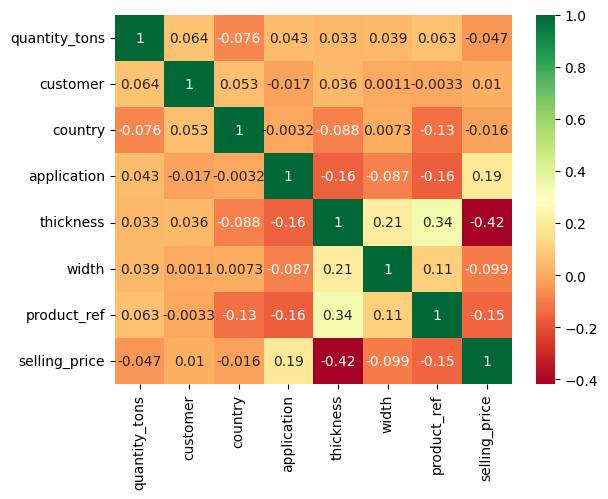

In [37]:
sns.heatmap(df.corr(), annot = True, cmap="RdYlGn")

In [30]:
# as application is not correlated with our target and its high skewness, we can transform.

df['application'] = np.sqrt(df['application'])
df['application'].skew()

0.37248195848272114

<Axes: xlabel='application', ylabel='Count'>

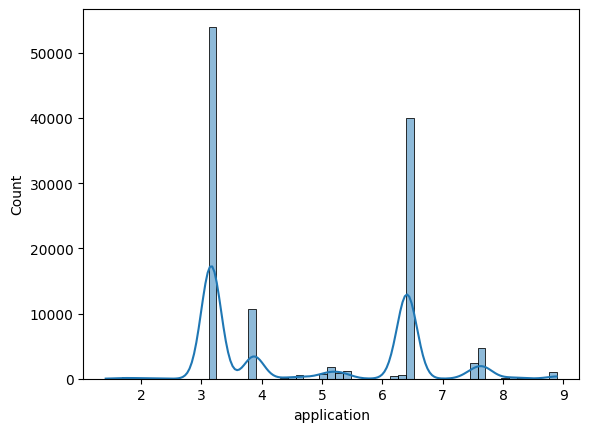

In [31]:
#viewing the data after transform to the needed skewness

sns.histplot(df['application'], kde = True)

In [32]:
x = df['product_ref'].values
y = df['selling_price'].values

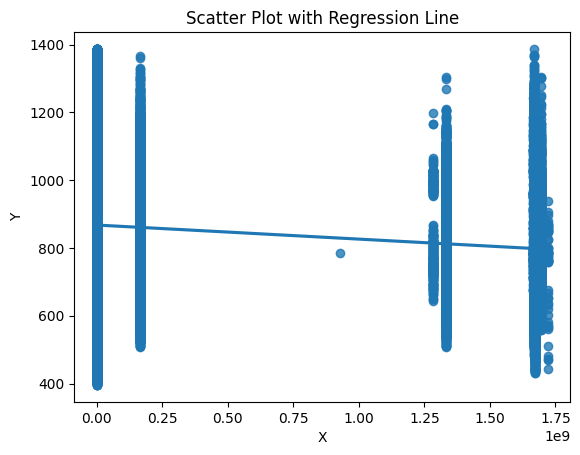

In [33]:
sns.regplot(x=x, y=y)  # scatter_kws adjusts the marker size
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Regression Line')
plt.show()


# Decision Tree **Classifier**

In [42]:
df.head(10)

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,3.162278,2.000,1500.0,1670798778,2021-07-01,854.00
8,2021-04-01,69.071853,30341428.0,38.0,Won,S,3.162278,0.600,1275.0,1668701376,2021-07-01,1363.00
12,2021-04-01,27.512545,30165529.0,78.0,Won,W,3.162278,0.750,1250.0,164141591,2021-07-01,1098.00
13,2021-04-01,32.235317,30202362.0,27.0,Won,S,3.162278,0.600,1010.0,628377,2021-07-01,973.00
14,2021-04-01,10.411350,30271717.0,28.0,To be approved,W,3.162278,0.600,1250.0,611993,2021-07-01,1258.00
15,2021-04-01,35.310332,30329143.0,32.0,Won,S,6.403124,0.370,1056.0,611993,2021-01-01,1028.00
16,2021-04-01,75.124394,30153510.0,30.0,Won,W,6.403124,0.595,1265.0,611993,2021-04-01,1161.86
17,2021-04-01,20.807114,30211222.0,30.0,Won,W,3.162278,0.450,900.0,611993,2021-07-01,1315.19
18,2021-04-01,16.253987,30271717.0,28.0,To be approved,W,3.162278,0.800,1250.0,611993,2021-07-01,1193.00
19,2021-04-01,53.581034,30329143.0,32.0,Won,S,6.403124,0.550,1220.0,611993,2021-01-01,1002.00


In [34]:
from sklearn.preprocessing import OneHotEncoder

In [45]:
print(df['item_type'].unique())
print(df['item_type'].value_counts())
print(df['status'].unique())
print(df['status'].value_counts())

['W' 'S' 'Others' 'PL' 'WI' 'IPL']
W         75167
S         44507
PL         2644
Others      265
WI           68
IPL          18
Name: item_type, dtype: int64
['Won' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful' 'Revised'
 'Offered' 'Offerable']
Won                82589
Lost               20834
Not lost for AM    13242
To be approved      3105
Revised             2841
Offered               48
Offerable              9
Wonderful              1
Name: status, dtype: int64


In [44]:
X=df[['quantity_tons','status','item_type','application','thickness','width','country','customer','product_ref']]
y=df['selling_price']

In [45]:
# encoding categorical variables

ohe = OneHotEncoder(handle_unknown='ignore')
ohe_item = ohe.fit_transform(df[['item_type']]).toarray()
ohe_status = ohe.fit_transform(df[['status']]).toarray()

In [46]:
X = np.concatenate((X[['quantity_tons', 'application', 'thickness', 'width','country','customer','product_ref']].values, ohe_item, ohe_status), axis=1)


In [49]:
df.head()

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,3.162278,2.00,1500.0,1670798778,2021-07-01,854.0
8,2021-04-01,69.071853,30341428.0,38.0,Won,S,3.162278,0.60,1275.0,1668701376,2021-07-01,1363.0
12,2021-04-01,27.512545,30165529.0,78.0,Won,W,3.162278,0.75,1250.0,164141591,2021-07-01,1098.0
13,2021-04-01,32.235317,30202362.0,27.0,Won,S,3.162278,0.60,1010.0,628377,2021-07-01,973.0
14,2021-04-01,10.411350,30271717.0,28.0,To be approved,W,3.162278,0.60,1250.0,611993,2021-07-01,1258.0


In [42]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [47]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 0.88398455, -0.93799803,  0.29566683, ..., -0.16110258,
         0.69371438, -0.00287857],
       [ 1.45711261, -0.93799803, -0.84895372, ..., -0.16110258,
         0.69371438, -0.00287857],
       [-0.13924568, -0.93799803, -0.7263158 , ..., -0.16110258,
         0.69371438, -0.00287857],
       ...,
       [ 1.95845818,  0.97599922, -0.37475378, ..., -0.16110258,
         0.69371438, -0.00287857],
       [ 2.74046503,  0.97599922, -0.55462272, ..., -0.16110258,
         0.69371438, -0.00287857],
       [-1.03334993,  0.97599922, -0.75901925, ..., -0.16110258,
         0.69371438, -0.00287857]])

In [41]:
from sklearn.model_selection import train_test_split

In [48]:
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [49]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((108615, 21), (108615,), (12069, 21), (12069,))

In [50]:
df.isnull().sum()

item_date        0
quantity_tons    0
customer         0
country          0
status           0
item_type        0
application      0
thickness        0
width            0
product_ref      0
delivery_date    0
selling_price    0
dtype: int64

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
model = DecisionTreeRegressor()
result = model.fit(X_train, y_train)

In [53]:
result.score(X_train, y_train) #getting 100% result on training data

1.0

In [54]:
y_pred= result.predict(X_test)

In [60]:
X_test

array([[ 7.31508266,  3.16227766,  0.5       , ...,  0.        ,
         1.        ,  0.        ],
       [21.54254345,  3.16227766,  3.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 5.17578585,  6.40312424,  1.83      , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [54.12184409,  6.40312424,  0.73      , ...,  0.        ,
         0.        ,  0.        ],
       [34.22783732,  3.16227766,  2.        , ...,  0.        ,
         0.        ,  0.        ],
       [47.32028849,  7.68114575,  3.75      , ...,  0.        ,
         1.        ,  0.        ]])

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 22136.1916796172
R-squared: 0.39467905043255114


We got 100% score on training data.

On test data we got 3.9% score because we did not provide any tuning parameters while intializing the tree as a result of which algorithm split the training data till the leaf node. Due to which depth of tree increased and our model did the overfitting.

That's why we are getting high score on our training data and less score on test data.

So to solve this problem we would use hyper parameter tuning.

We can use GridSearch or RandomizedSearch for hyper parameters tuning. **bold text**

<ipython-input-56-ebf5ee2869bf>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<Axes: xlabel='selling_price', ylabel='Density'>

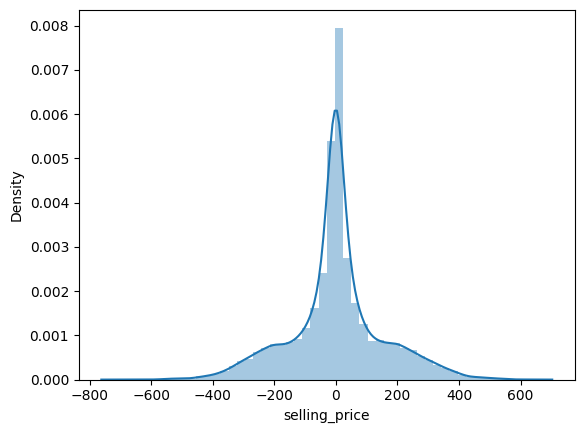

In [56]:
y_pred= result.predict(X_test)

#Let us do a distribution plot between our label y and predicted y values.

sns.distplot(y_test-y_pred)

#We are getting nearly bell shape curve more like narrow bell that means our model working good?
# No we can't make that conclusion. Good bell curve only tell us the range of predicted values are with in the same range as our original data range values are.

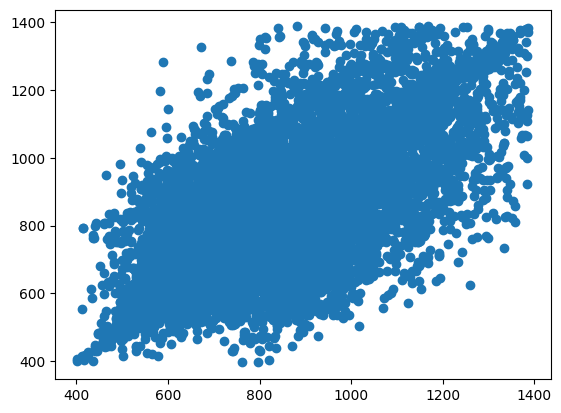

In [57]:
#checking predicted y and labeled y using a scatter plot.

plt.scatter(y_test, y_pred)

# Hyperparameter tuning

In [80]:
# Process of finding the best set of model with different configuration changing on same data. Important, no need to set before training data.
# Goal to improve the model's performance on unseen data
# 3 tyeps, they are
# Grid search
# Randomized search
#Bayesian Search

In [36]:
parameters={"splitter":["best","random"],
            "max_depth" : [2,5,10,20],
           "min_samples_split":[2,5,10],
           "min_samples_leaf":[1,2,4],
           "max_features":["log2","sqrt"]}

In [37]:
from sklearn.model_selection import GridSearchCV

In [58]:
grid_tune = GridSearchCV(estimator=model, param_grid=parameters, cv = 5)
grid_tune.fit(X_train, y_train)
print("best_params:", grid_tune.best_params_)

best_params: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}


In [119]:
best_model = grid_tune.best_estimator_
y_pred = best_model.predict(X_test)
# evalution metrics after tuning
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 17442.171307612516
R-squared: 0.5245396379011221


DECISION TREE CLASSIFIER

In [59]:
df['status'].value_counts()

Won                81475
Lost               20378
Not lost for AM    12969
To be approved      3053
Revised             2753
Offered               46
Offerable              9
Wonderful              1
Name: status, dtype: int64

In [60]:
df[df['status'].isin(['Won','Lost'])]

,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,delivery_date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,3.162278,2.00,1500.0,1670798778,2021-07-01,854.0
8,2021-04-01,69.071853,30341428.0,38.0,Won,S,3.162278,0.60,1275.0,1668701376,2021-07-01,1363.0
12,2021-04-01,27.512545,30165529.0,78.0,Won,W,3.162278,0.75,1250.0,164141591,2021-07-01,1098.0
13,2021-04-01,32.235317,30202362.0,27.0,Won,S,3.162278,0.60,1010.0,628377,2021-07-01,973.0
15,2021-04-01,35.310332,30329143.0,32.0,Won,S,6.403124,0.37,1056.0,611993,2021-01-01,1028.0
...,...,...,...,...,...,...,...,...,...,...,...,...
181662,2020-07-02,76.859457,30200854.0,25.0,Won,W,6.403124,1.18,1500.0,164141591,2020-07-01,591.0
181665,2020-07-02,6.169226,30200854.0,25.0,Won,W,6.403124,0.71,1300.0,164141591,2020-07-01,608.0
181666,2020-07-02,82.123794,30200854.0,25.0,Won,W,6.403124,1.18,1220.0,164141591,2020-07-01,590.0
181668,2020-07-02,102.482422,30200854.0,25.0,Won,W,6.403124,0.96,1220.0,164141591,2020-07-01,591.0


In [62]:
df= df[df['status'].isin(['Won','Lost'])]

In [63]:
df['status'].value_counts()

Won     81475
Lost    20378
Name: status, dtype: int64

In [65]:
print(len(df['status']))
print(len(df))

101853
101853


In [66]:
#convert categorical column using ordingal encoder.
from sklearn.preprocessing import OrdinalEncoder

In [67]:
OR = OrdinalEncoder()
df['status'] = OR.fit_transform(df[['status']])
df['item_type'] = OR.fit_transform(df[['item_type']])

<ipython-input-67-7f1d26534821>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status'] = OR.fit_transform(df[['status']])
<ipython-input-67-7f1d26534821>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['item_type'] = OR.fit_transform(df[['item_type']])


In [70]:
#split data into X, y
X= df[['quantity_tons','selling_price','item_type','application','thickness','width','country','customer','product_ref']]
y = df['status']

In [93]:
df['status'].unique()

array([1., 0.])

In [72]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 0.9100066 ,  0.05118381,  0.69903006, ..., -0.73867125,
        -0.60584823,  1.69149781],
       [ 1.48553975,  2.72761134, -1.14357628, ..., -0.33564786,
         0.96648294,  1.68853404],
       [-0.11751752,  1.33418639,  0.69903006, ...,  1.27644571,
        -0.52752895, -0.43751106],
       ...,
       [ 1.98898917, -1.33698293,  0.69903006, ..., -0.85957827,
        -0.2274933 , -0.43751106],
       [ 2.77427765, -1.33172472,  0.69903006, ..., -0.85957827,
        -0.2274933 , -0.43751106],
       [-1.0153738 , -1.18449491,  0.69903006, ..., -0.85957827,
        -0.2274933 , -0.43751106]])

In [71]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(71297, 9)
(30556, 9)
(71297,)
(30556,)


In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
dtc = DecisionTreeClassifier(max_depth = 5, random_state = 1)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [76]:
y_pred = dtc.predict(X_test)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [78]:
cm_dtc = confusion_matrix(y_test, y_pred)

cm_dtc

array([[ 1220,  4901],
       [  509, 23926]])

In [79]:
acc_dtc = accuracy_score(y_test, y_pred)
acc_dtc

0.8229480298468386

In [82]:
pip install xgboost

In [95]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report, roc_curve, auc


In [85]:
xgb_classifier = XGBClassifier()

In [87]:
#  Fit the classifier to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the accuracy of the XGB_classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9032595889514334


In [88]:
df[['quantity_tons','selling_price','item_type','application','thickness','width','country','customer','product_ref']]

,quantity_tons,selling_price,item_type,application,thickness,width,country,customer,product_ref
0,54.151139,854.0,4.0,3.162278,2.00,1500.0,28.0,30156308.0,1670798778
8,69.071853,1363.0,3.0,3.162278,0.60,1275.0,38.0,30341428.0,1668701376
12,27.512545,1098.0,4.0,3.162278,0.75,1250.0,78.0,30165529.0,164141591
13,32.235317,973.0,3.0,3.162278,0.60,1010.0,27.0,30202362.0,628377
15,35.310332,1028.0,3.0,6.403124,0.37,1056.0,32.0,30329143.0,611993
...,...,...,...,...,...,...,...,...,...
181662,76.859457,591.0,4.0,6.403124,1.18,1500.0,25.0,30200854.0,164141591
181665,6.169226,608.0,4.0,6.403124,0.71,1300.0,25.0,30200854.0,164141591
181666,82.123794,590.0,4.0,6.403124,1.18,1220.0,25.0,30200854.0,164141591
181668,102.482422,591.0,4.0,6.403124,0.96,1220.0,25.0,30200854.0,164141591


In [90]:
pred_stats = np.array([[54.151139	, 854.0, 4.0, 3.162278, 2.00, 1500.0, 28.0, 30156308.0, 1670798778]])
new = xgb_classifier.predict(pred_stats)

In [91]:
new

array([1])

In [99]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

         0.0       0.82      0.66      0.73      6121
         1.0       0.92      0.96      0.94     24435

    accuracy                           0.90     30556
   macro avg       0.87      0.81      0.84     30556
weighted avg       0.90      0.90      0.90     30556

